### Working on timeseries

In [5]:
import pandas as pd
import numpy as np

In [38]:
df = pd.read_csv("final_dataset.csv")
df = df.rename(columns={"Unnamed: 0": "Date"})
df

,Date,avg_tripduration,total_trips,unique_start_stations,unique_end_stations,usertype_Customer,usertype_Subscriber
0,2013-06-01,2507.860124,8722,328,327,3583,5139
1,2013-06-02,2066.265919,15971,332,332,10736,5235
2,2013-06-03,1938.590945,7598,325,324,2985,4613
3,2013-06-04,3116.571981,15782,329,330,6954,8828
4,2013-06-05,2468.716953,15690,331,331,7071,8619
...,...,...,...,...,...,...,...
3411,2020-12-27,1060.693212,23871,2630,1436,4480,19391
3412,2020-12-28,924.891042,38911,2868,1498,6632,32279
3413,2020-12-29,882.434188,33322,2798,1472,4673,28649
3414,2020-12-30,850.319357,35816,2807,1485,5039,30777


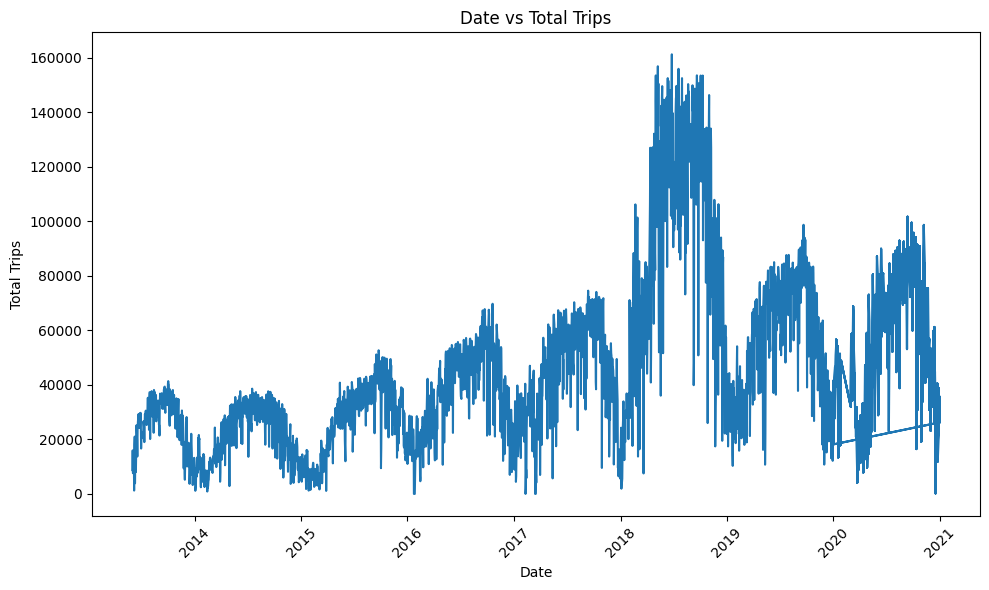

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Rename the first column to 'Date'
df.rename(columns={df.columns[0]: 'Date'}, inplace=True)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Plot 'Date' vs 'total_trips'
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['total_trips'])
plt.xlabel('Date')
plt.ylabel('Total Trips')
plt.title('Date vs Total Trips')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Smoothing

In [8]:
# Calculate the first difference using pandas' diff method
df['first_diff'] = df['total_trips'].diff().fillna(0)  # `fillna(0)` is used to handle the first row with NaN

df['first_diff']

0           0.0
1        7249.0
2       -8373.0
3        8184.0
4         -92.0
         ...   
3411     3894.0
3412    15040.0
3413    -5589.0
3414     2494.0
3415    -9583.0
Name: first_diff, Length: 3416, dtype: float64

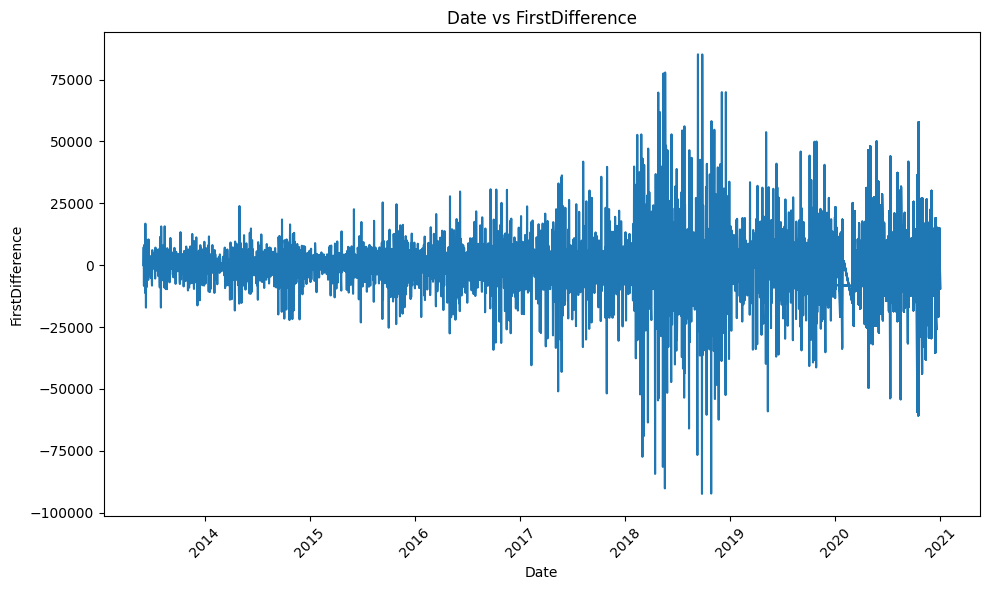

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Rename the first column to 'Date'
df.rename(columns={df.columns[0]: 'Date'}, inplace=True)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Plot 'Date' vs 'total_trips'
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['first_diff'])
plt.xlabel('Date')
plt.ylabel('FirstDifference')
plt.title('Date vs FirstDifference')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

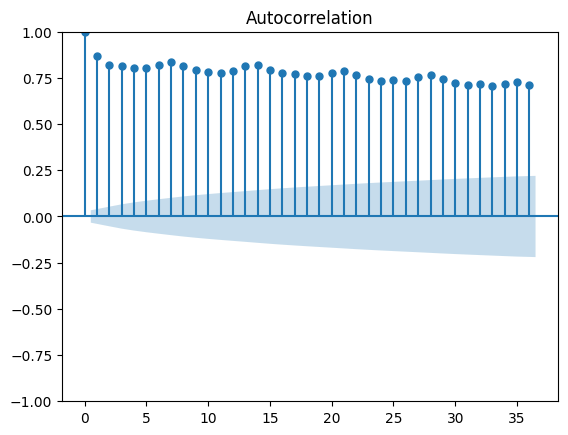

In [40]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

acf_plot = plot_acf(df['total_trips'])
plt.show()

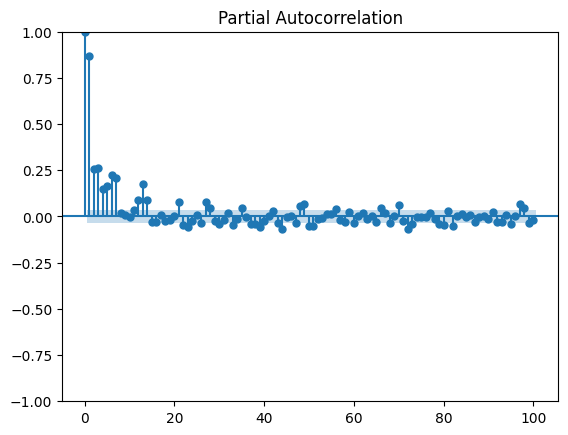

In [41]:
from statsmodels.graphics.tsaplots import plot_pacf

# Plot PACF
pacf_plot = plot_pacf(df['total_trips'], lags=100)
plt.show()

In [42]:
df

,Date,avg_tripduration,total_trips,unique_start_stations,unique_end_stations,usertype_Customer,usertype_Subscriber
0,2013-06-01,2507.860124,8722,328,327,3583,5139
1,2013-06-02,2066.265919,15971,332,332,10736,5235
2,2013-06-03,1938.590945,7598,325,324,2985,4613
3,2013-06-04,3116.571981,15782,329,330,6954,8828
4,2013-06-05,2468.716953,15690,331,331,7071,8619
...,...,...,...,...,...,...,...
3411,2020-12-27,1060.693212,23871,2630,1436,4480,19391
3412,2020-12-28,924.891042,38911,2868,1498,6632,32279
3413,2020-12-29,882.434188,33322,2798,1472,4673,28649
3414,2020-12-30,850.319357,35816,2807,1485,5039,30777


In [70]:
df = pd.read_csv("final_dataset.csv")
# Rename the 'Unnamed: 0' column to 'Date' and update df
df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

# Check the first few rows to verify the renaming
df['Date'] = pd.to_datetime(df['Date'])


In [73]:
# Group by 'Date' and sum the 'total_trips' for each date
df = df.groupby('Date')['total_trips'].sum()

# Check the result
df

Date
2013-06-01      8722
2013-06-02     15971
2013-06-03      7598
2013-06-04     15782
2013-06-05     15690
               ...  
2020-12-27     71613
2020-12-28    116733
2020-12-29     99966
2020-12-30    107448
2020-12-31     78699
Name: total_trips, Length: 2742, dtype: int64

In [74]:
df = df.asfreq(pd.infer_freq(df.index))

In [75]:
df

Date
2013-06-01      8722.0
2013-06-02     15971.0
2013-06-03      7598.0
2013-06-04     15782.0
2013-06-05     15690.0
                ...   
2020-12-27     71613.0
2020-12-28    116733.0
2020-12-29     99966.0
2020-12-30    107448.0
2020-12-31     78699.0
Freq: D, Name: total_trips, Length: 2771, dtype: float64

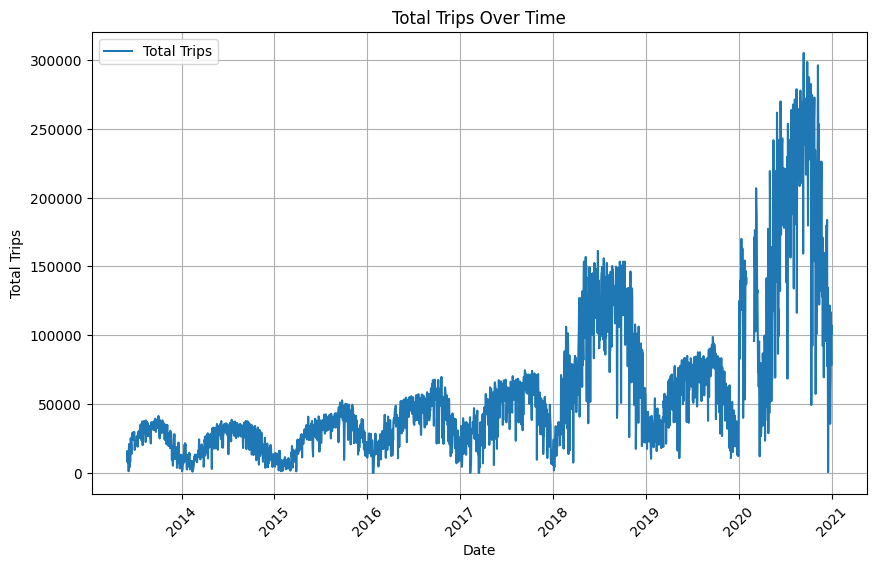

In [76]:
import matplotlib.pyplot as plt

# Plot the 'total_trips' column (which is now the series after grouping by Date)
plt.figure(figsize=(10, 6))  # Optional: to adjust the figure size
plt.plot(df.index, df, label='Total Trips')  # Plot 'total_trips' over time
plt.xlabel('Date')  # Label for x-axis
plt.ylabel('Total Trips')  # Label for y-axis
plt.title('Total Trips Over Time')  # Title for the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()  # Show legend
plt.grid(True)  # Display grid lines
plt.show()  # Show the plot


KeyError: 'total_trips'

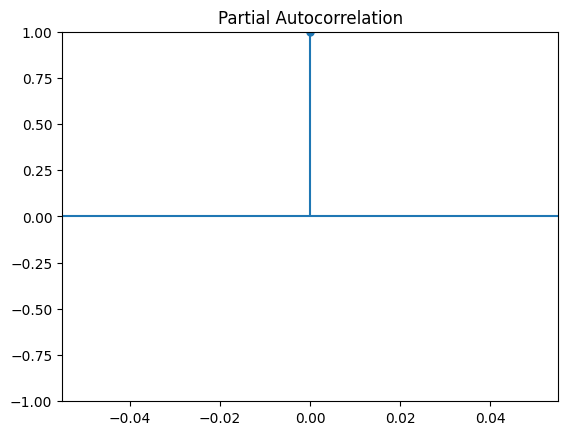

In [46]:
from statsmodels.graphics.tsaplots import plot_pacf

# Plot PACF
pacf_plot = plot_pacf(df_new['total_trips'], lags=100)
plt.show()

In [47]:
df_new

,total_trips
Date,
2013-06-01,8722.0
2013-06-02,15971.0
2013-06-03,7598.0
2013-06-04,15782.0
2013-06-05,15690.0
...,...
2020-12-27,23871.0
2020-12-28,38911.0
2020-12-29,33322.0
